In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import pylab
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df=pd.read_csv(r'C:\Users\Asus\Documents\python\assignment\Dataset - HR Employee Attrition.csv')

In [3]:
df

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [4]:
hr=pd.DataFrame(df)

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [6]:
df.isna().sum()

EmployeeNumber              0
Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_num=hr.select_dtypes(np.number)

In [9]:
df_num=pd.DataFrame(df_num)

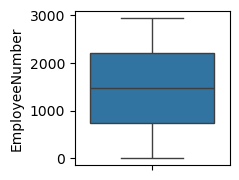

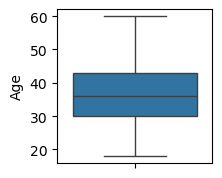

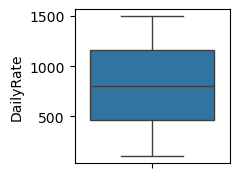

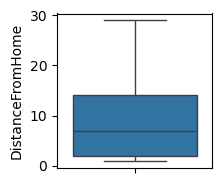

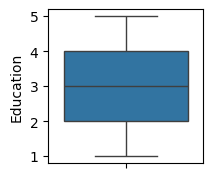

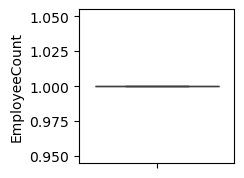

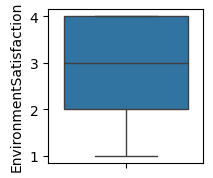

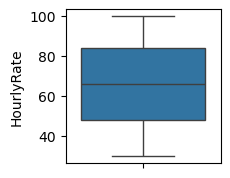

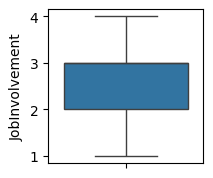

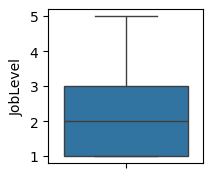

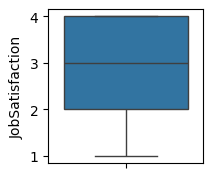

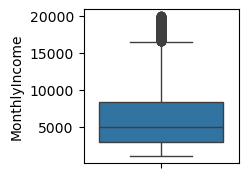

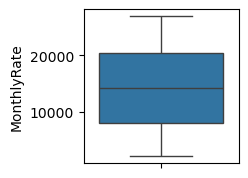

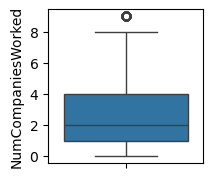

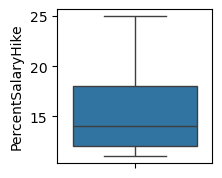

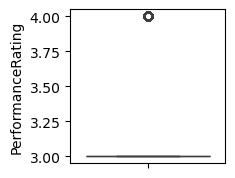

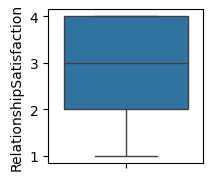

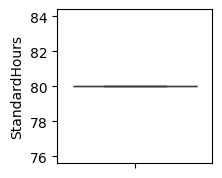

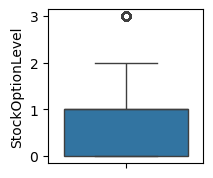

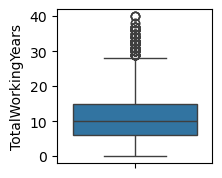

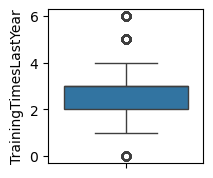

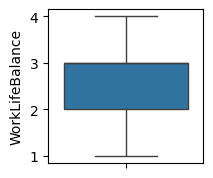

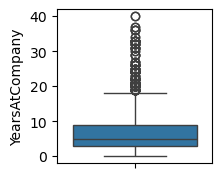

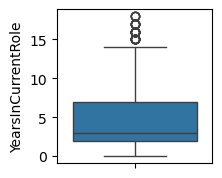

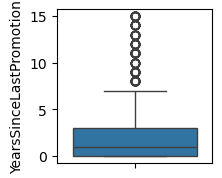

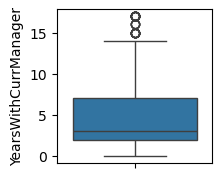

In [10]:
for i in df_num:
    plt.figure(figsize=(2,2))
    sns.boxplot(y=i,data=df_num)
    plt.show()

In [11]:
df_quantile=df_num.quantile([.25,.5,.75])

In [12]:
#monthly income
df_quantile['MonthlyIncome']

0.25    2911.0
0.50    4919.0
0.75    8380.0
Name: MonthlyIncome, dtype: float64

In [13]:
min=2911-(1.5*5469)
max=8380+(1.5*5459)
print(min,max)

-5292.5 16568.5


In [14]:
hr['MonthlyIncome']=df_num['MonthlyIncome']=np.clip(df_num['MonthlyIncome'],-5292.5,16568.5)

<Axes: ylabel='MonthlyIncome'>

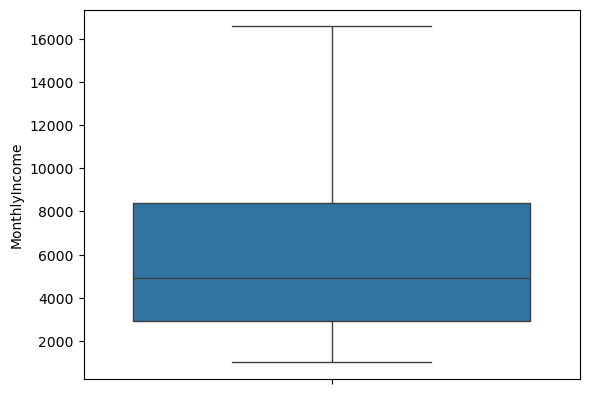

In [15]:
sns.boxplot(df_num.MonthlyIncome)

In [16]:
df_quantile['NumCompaniesWorked']

0.25    1.0
0.50    2.0
0.75    4.0
Name: NumCompaniesWorked, dtype: float64

In [17]:
min=1-(1.5*3)
max=4+(1.5*3)
print(min,max)

-3.5 8.5


In [18]:
hr['NumCompaniesWorked']=df_num['NumCompaniesWorked']=np.clip(df_num['NumCompaniesWorked'],-3.5,8.5)

<Axes: ylabel='NumCompaniesWorked'>

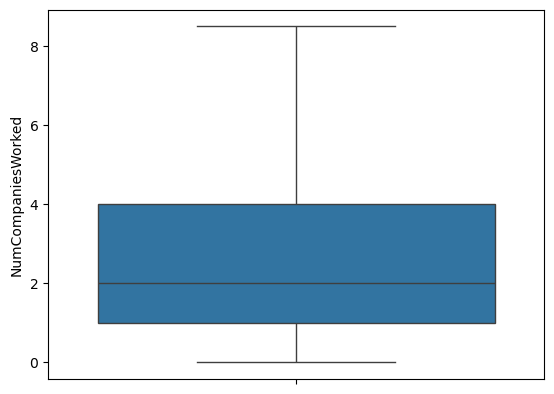

In [19]:
sns.boxplot(hr['NumCompaniesWorked'])

In [20]:
#performance

In [21]:
df_quantile['PerformanceRating']

0.25    3.0
0.50    3.0
0.75    3.0
Name: PerformanceRating, dtype: float64

In [22]:
min=3
max=3

In [23]:
hr['PerformanceRating']=df_num['PerformanceRating']=np.clip(df_num['PerformanceRating'],3,3)

<Axes: ylabel='PerformanceRating'>

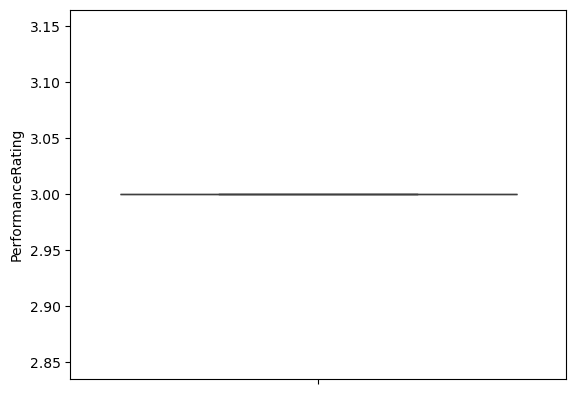

In [24]:
sns.boxplot(hr['PerformanceRating'])

In [25]:
#stocklevel

In [26]:
df_quantile['StockOptionLevel']

0.25    0.0
0.50    1.0
0.75    1.0
Name: StockOptionLevel, dtype: float64

In [27]:
min=0-(1.5*1)
max=1+(1.5*1)
print(min,max)

-1.5 2.5


In [28]:
hr['StockOptionLevel']=df_num['StockOptionLevel']=np.clip(df_num['StockOptionLevel'],-1.5,2.5)

<Axes: ylabel='StockOptionLevel'>

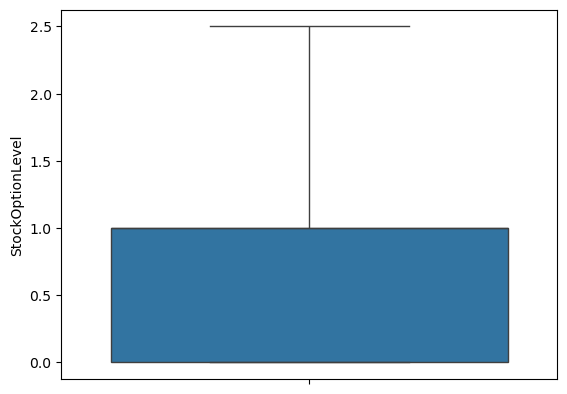

In [29]:
sns.boxplot(hr['StockOptionLevel'])

In [30]:
#total working hours
df_quantile['TotalWorkingYears']

0.25     6.0
0.50    10.0
0.75    15.0
Name: TotalWorkingYears, dtype: float64

In [31]:
min=6-(1.5*9)
max=15+(1.5*9)
print(min,max)

-7.5 28.5


In [32]:
hr['TotalWorkingYears']=df_num['TotalWorkingYears']=np.clip(df_num['TotalWorkingYears'],-7.5,28.5)

<Axes: ylabel='TotalWorkingYears'>

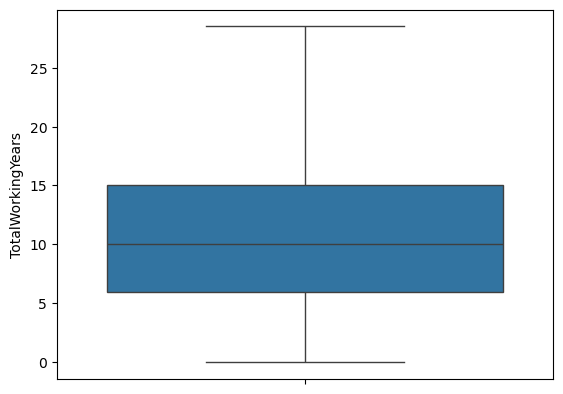

In [33]:
sns.boxplot(hr['TotalWorkingYears'])

In [34]:
df_quantile['TrainingTimesLastYear']

0.25    2.0
0.50    3.0
0.75    3.0
Name: TrainingTimesLastYear, dtype: float64

In [35]:
min=2-(1.5*1)
max=3+(1.5*1)
print(min,max)

0.5 4.5


In [36]:
hr['TrainingTimesLastYear']=df_num['TrainingTimesLastYear']=np.clip(df_num['TrainingTimesLastYear'],0.5,4.5)

<Axes: ylabel='TrainingTimesLastYear'>

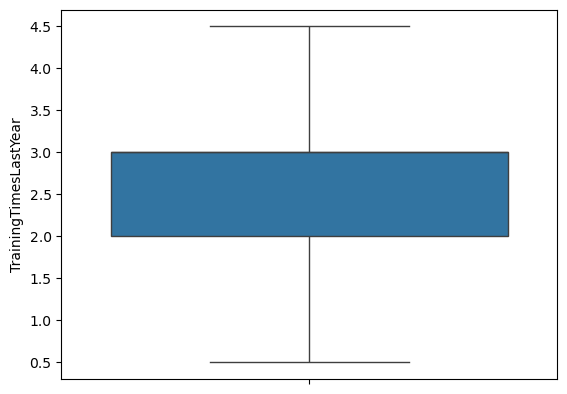

In [37]:
sns.boxplot(hr['TrainingTimesLastYear'])

In [38]:
#companyyears

In [39]:
df_quantile['YearsAtCompany']

0.25    3.0
0.50    5.0
0.75    9.0
Name: YearsAtCompany, dtype: float64

In [40]:
min=3-(1.5*6)
max=9+(1.5*6)
print(min,max)

-6.0 18.0


In [41]:
hr['YearsAtCompany']=df_num['YearsAtCompany']=np.clip(df_num['YearsAtCompany'],-6.0,18.0)

<Axes: ylabel='YearsAtCompany'>

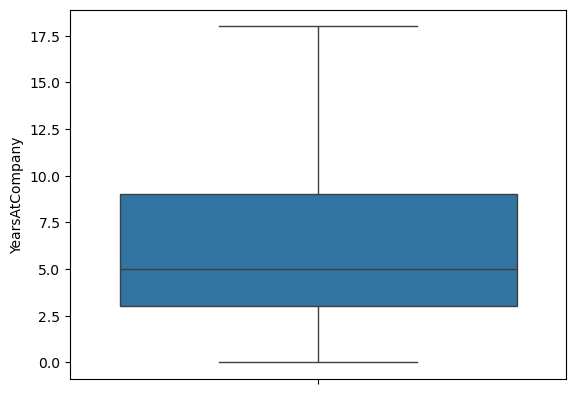

In [42]:
sns.boxplot(hr['YearsAtCompany'])

In [43]:
#yearsincurrent

In [44]:
df_quantile['YearsInCurrentRole']

0.25    2.0
0.50    3.0
0.75    7.0
Name: YearsInCurrentRole, dtype: float64

In [45]:
min=2-(1.5*5)
max=7+(1.5*5)
print(min,max)

-5.5 14.5


In [46]:
hr['YearsInCurrentRole']=df_num['YearsInCurrentRole']=np.clip(df_num['YearsInCurrentRole'],-5.5,14.5)

<Axes: ylabel='YearsInCurrentRole'>

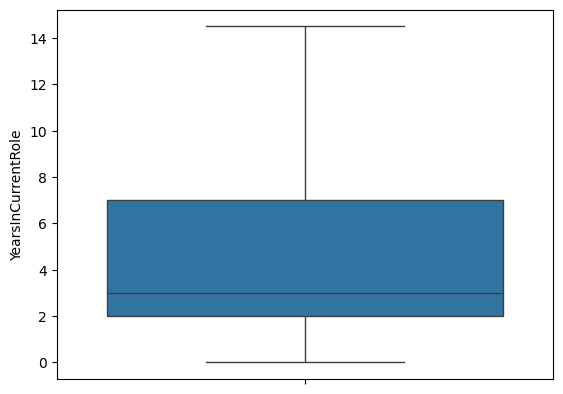

In [47]:
sns.boxplot(hr['YearsInCurrentRole'])

In [48]:
#lastpromotion
df_quantile['YearsSinceLastPromotion']

0.25    0.0
0.50    1.0
0.75    3.0
Name: YearsSinceLastPromotion, dtype: float64

In [49]:
min=-(1.5*3)
max=3+(1.5*3)
print(min,max)

-4.5 7.5


In [50]:
hr['YearsSinceLastPromotion']=df_num['YearsSinceLastPromotion']=np.clip(df_num['YearsSinceLastPromotion'],-4.5,7.5)

<Axes: ylabel='YearsSinceLastPromotion'>

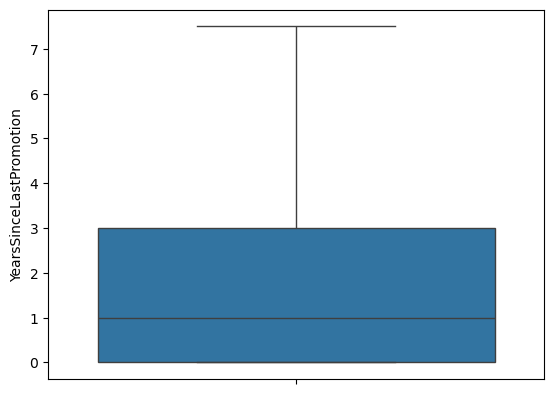

In [51]:
sns.boxplot(hr['YearsSinceLastPromotion'])

In [52]:
#currmanagmer
df_quantile['YearsWithCurrManager']

0.25    2.0
0.50    3.0
0.75    7.0
Name: YearsWithCurrManager, dtype: float64

In [53]:
min=2-(1.5*5)
max=7+(1.5*5)
print(min,max)

-5.5 14.5


In [54]:
hr['YearsWithCurrManager']=df_num['YearsWithCurrManager']=np.clip(df_num['YearsWithCurrManager'],-5.5,14.5)

<Axes: ylabel='YearsWithCurrManager'>

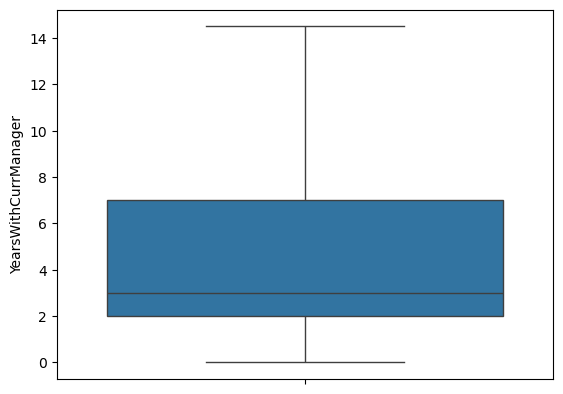

In [55]:
sns.boxplot(hr['YearsWithCurrManager'])

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in hr.columns:
    hr[i]=le.fit_transform(hr[i])

In [57]:
##############Visualization###################

<Axes: >

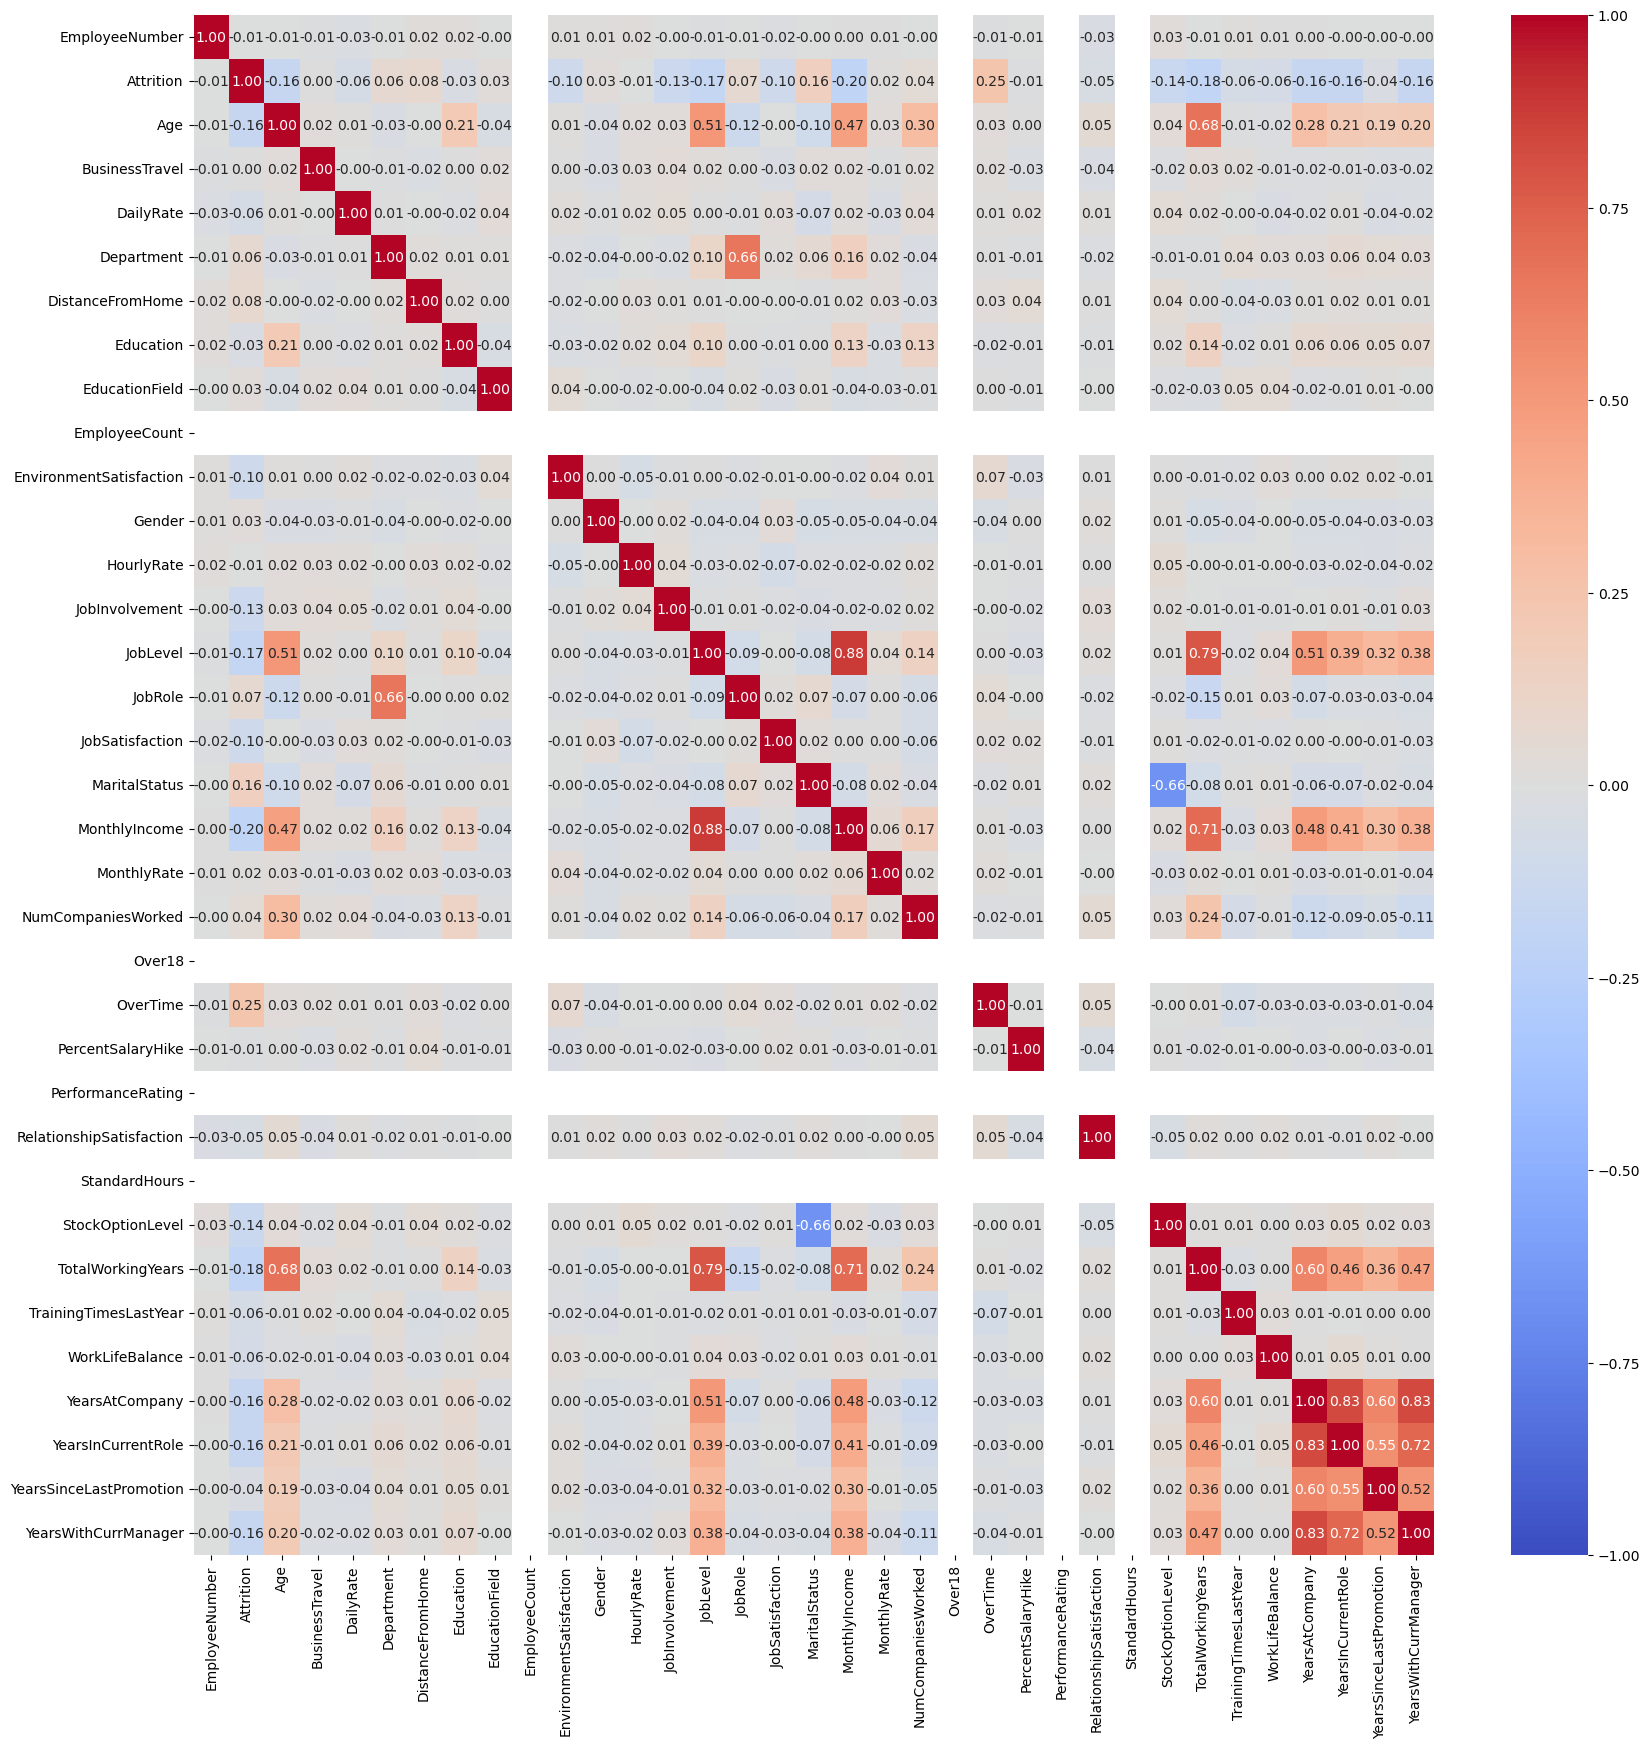

In [58]:
plt.figure(figsize=(20, 20))
sns.heatmap(hr.corr(),fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,annot=True)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 

In [60]:
X = add_constant(hr)
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
print(vif)

C:\Users\Asus\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


const                       78.574821
EmployeeNumber               1.006258
Attrition                    1.292581
Age                          2.058199
BusinessTravel               1.014904
DailyRate                    1.025979
Department                   1.997669
DistanceFromHome             1.020775
Education                    1.067588
EducationField               1.016900
EmployeeCount                     NaN
EnvironmentSatisfaction      1.041511
Gender                       1.022336
HourlyRate                   1.020528
JobInvolvement               1.039346
JobLevel                     6.215378
JobRole                      1.910642
JobSatisfaction              1.039116
MaritalStatus                1.855343
MonthlyIncome                4.997641
MonthlyRate                  1.018818
NumCompaniesWorked           1.289282
Over18                            NaN
OverTime                     1.119085
PercentSalaryHike            1.012764
PerformanceRating                 NaN
Relationship

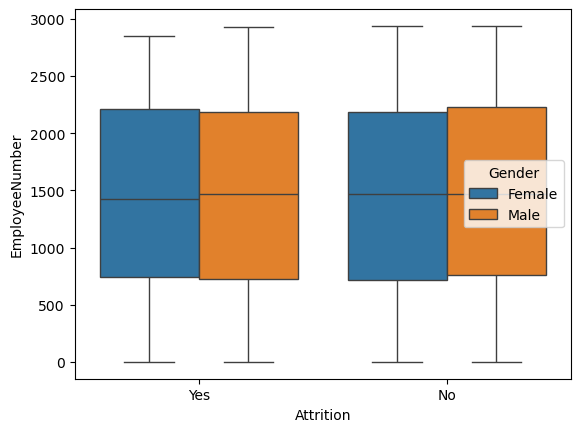

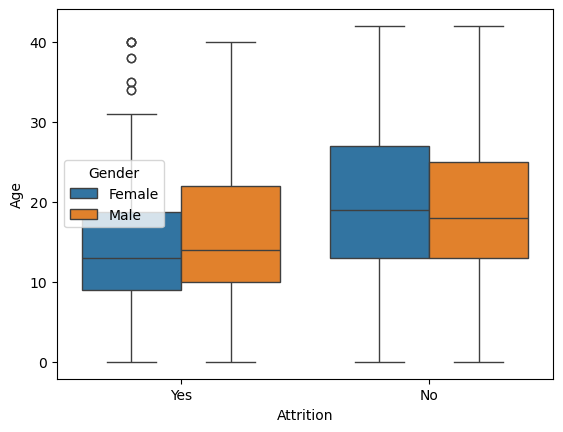

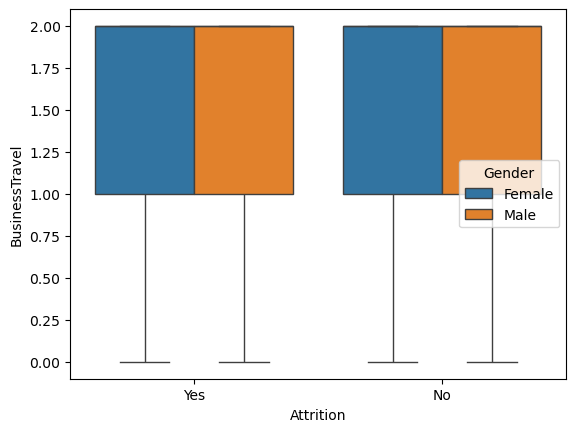

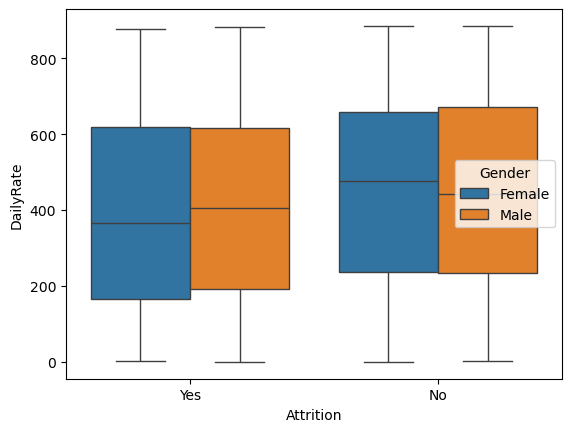

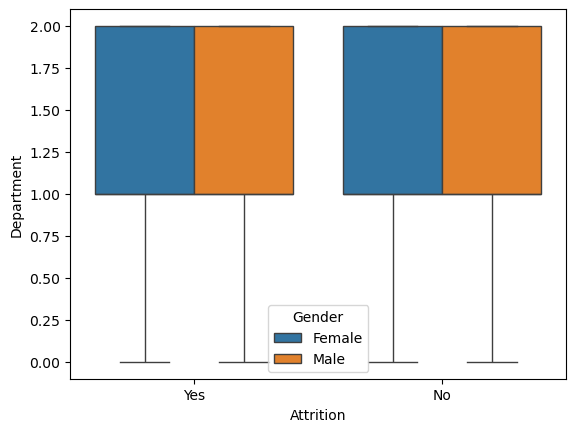

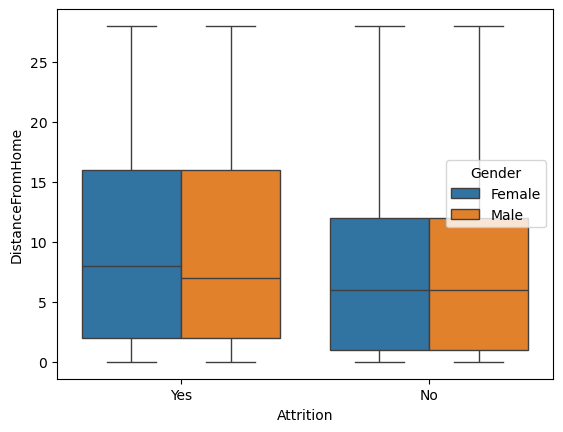

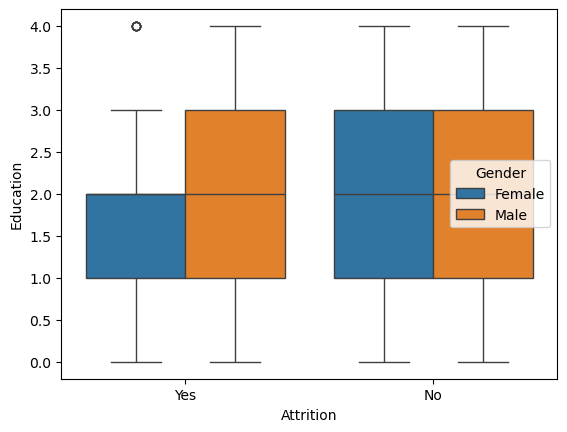

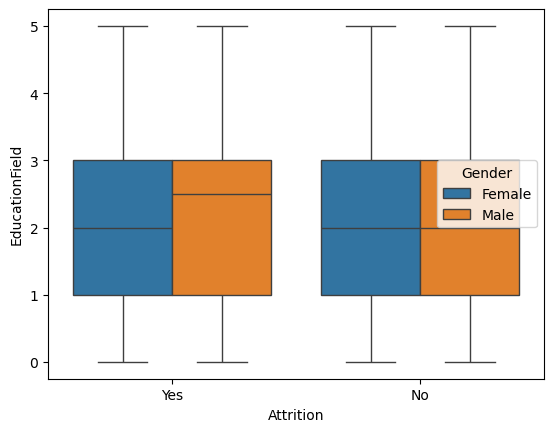

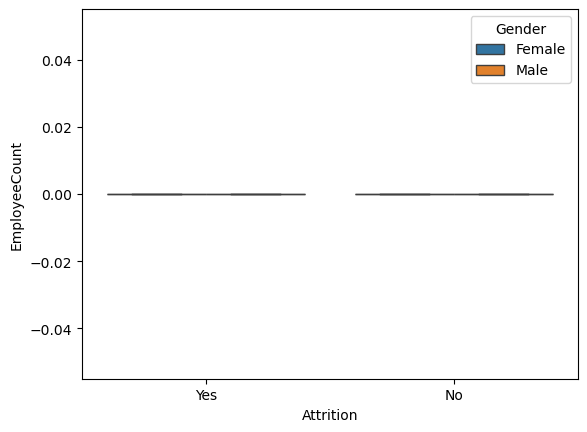

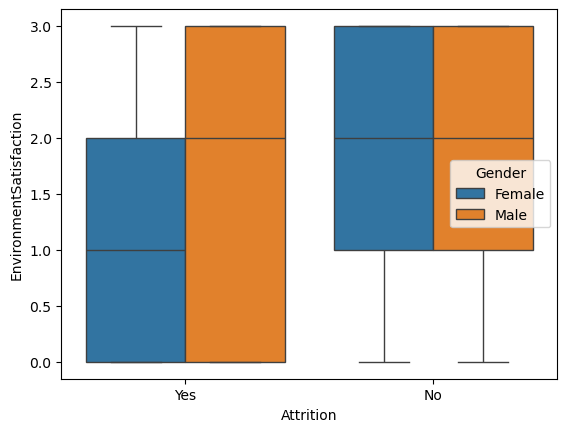

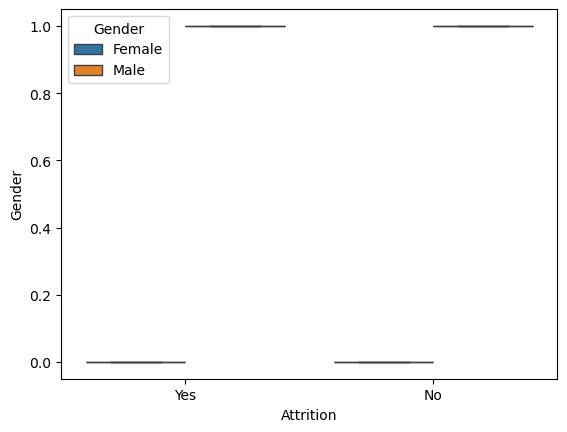

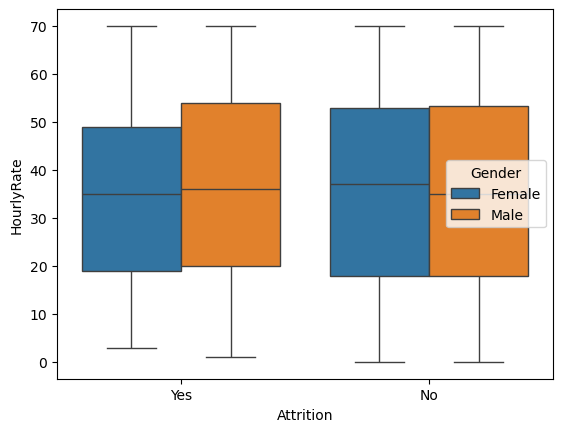

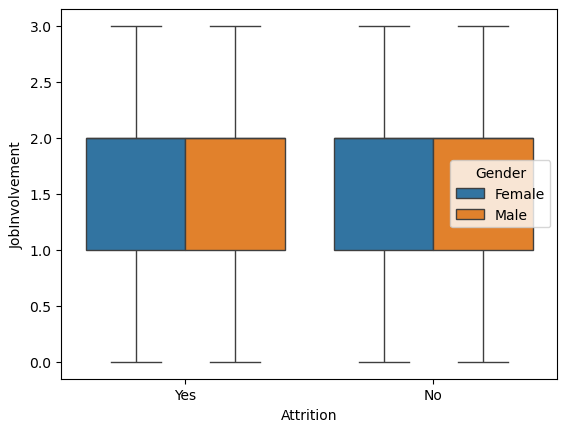

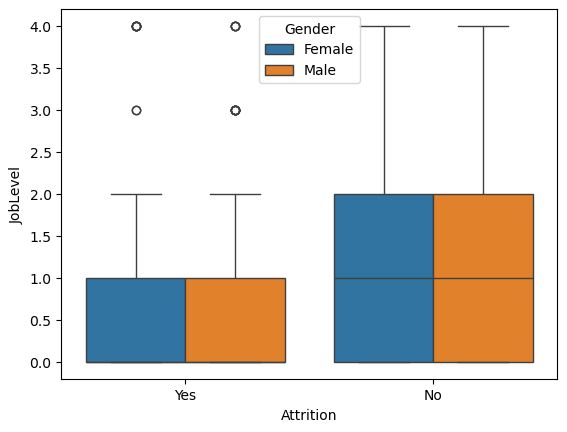

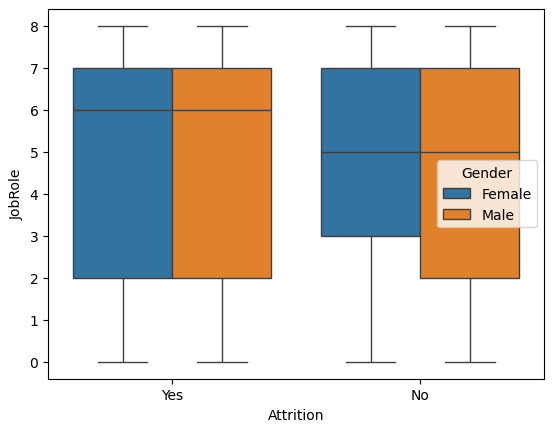

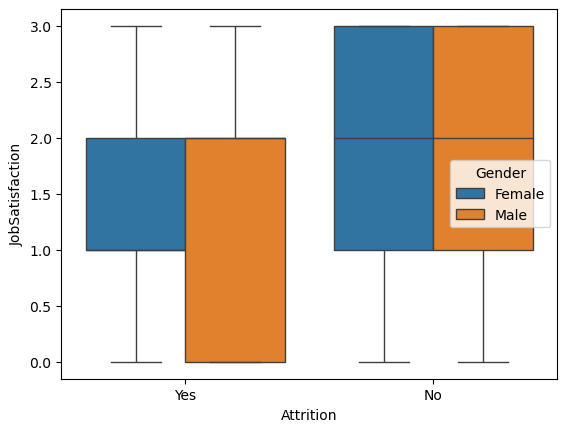

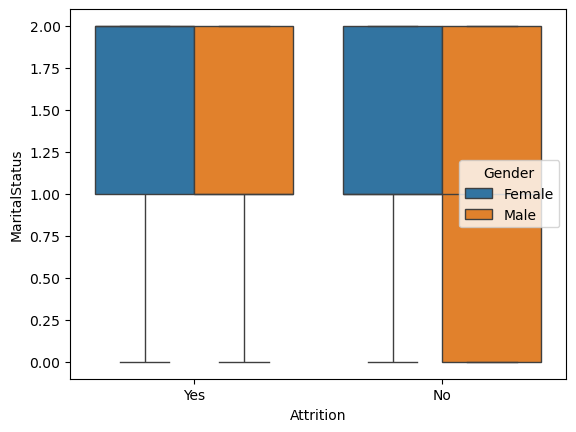

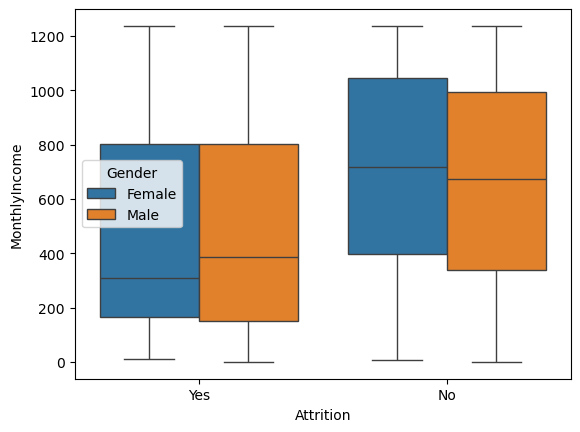

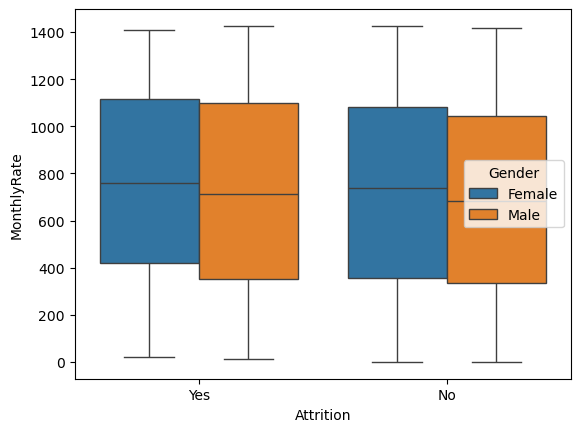

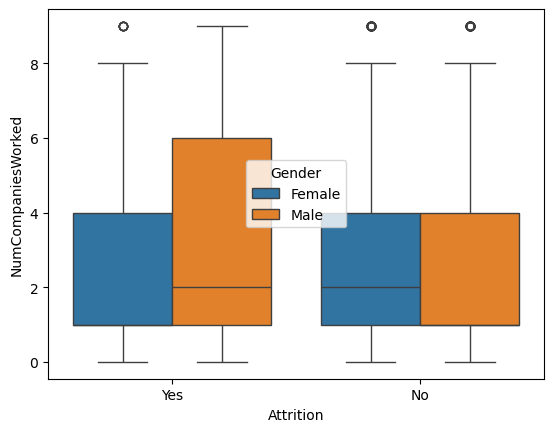

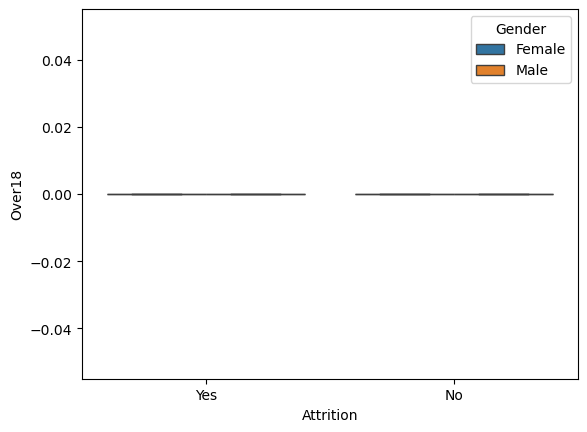

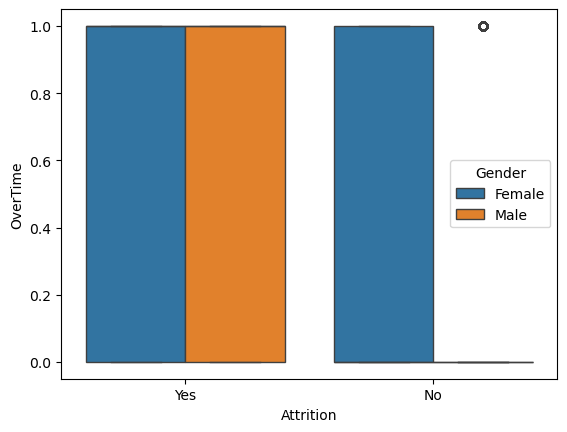

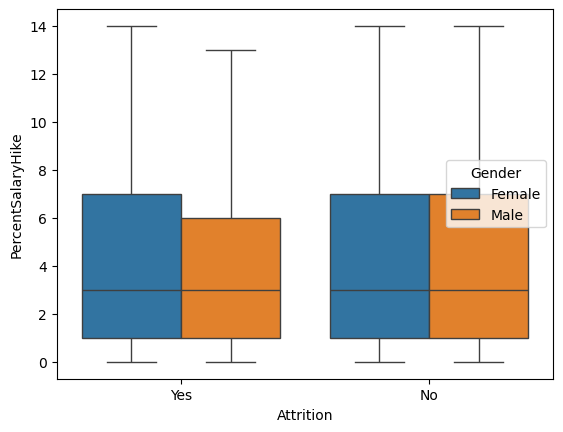

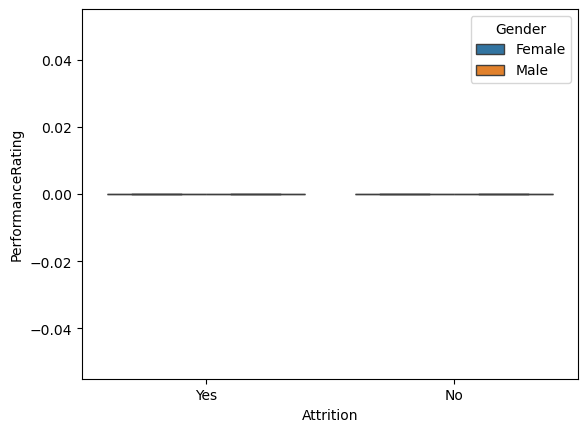

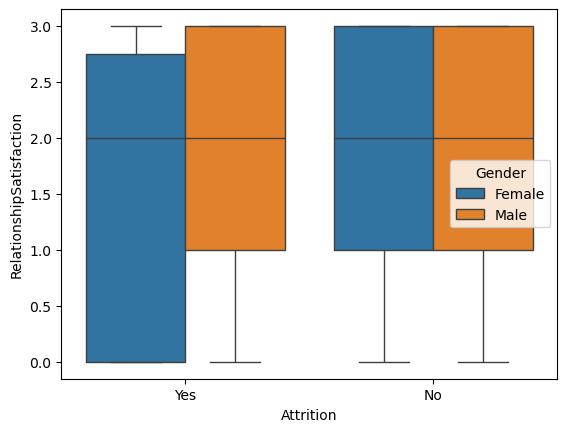

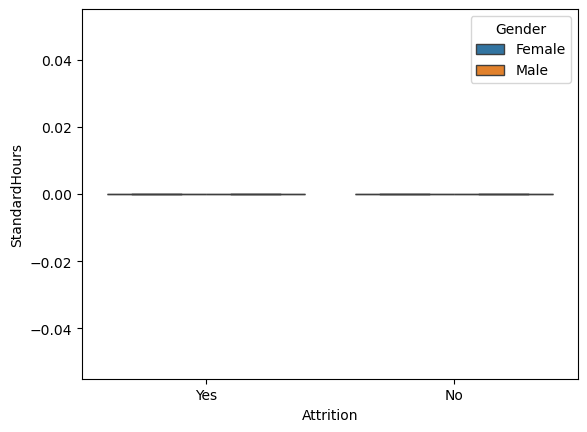

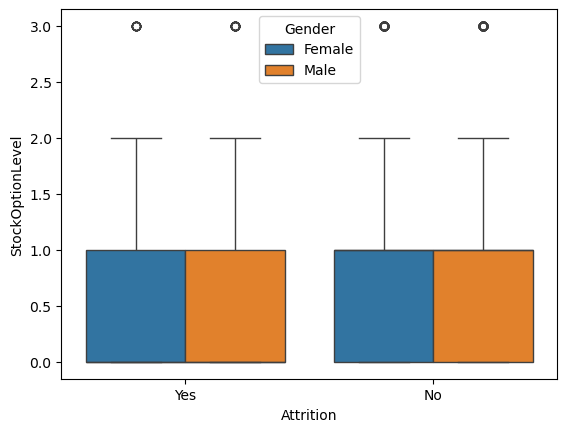

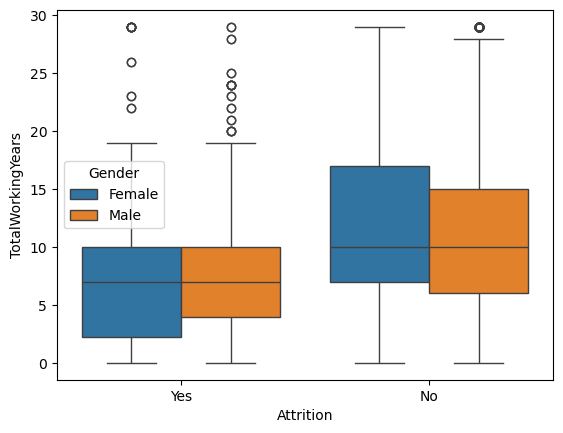

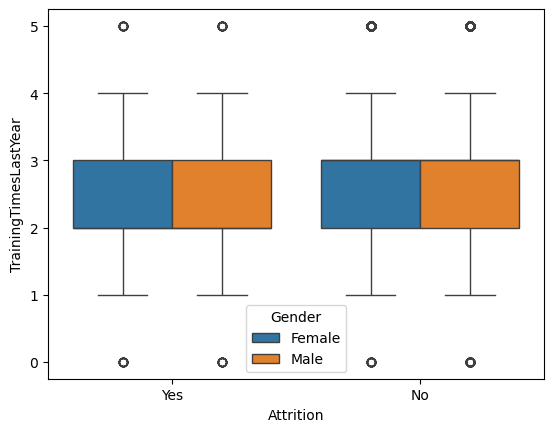

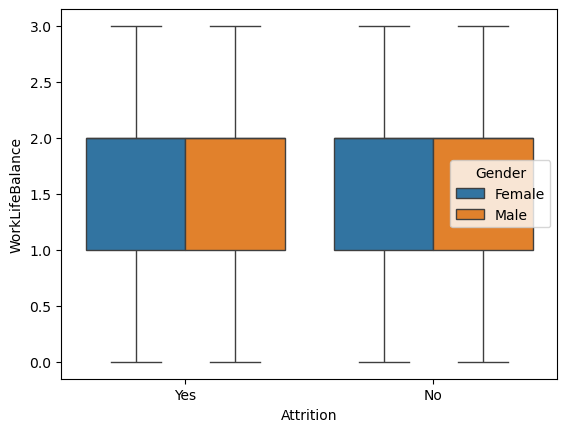

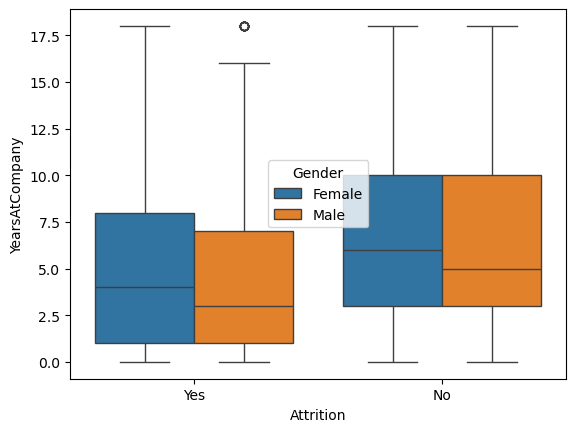

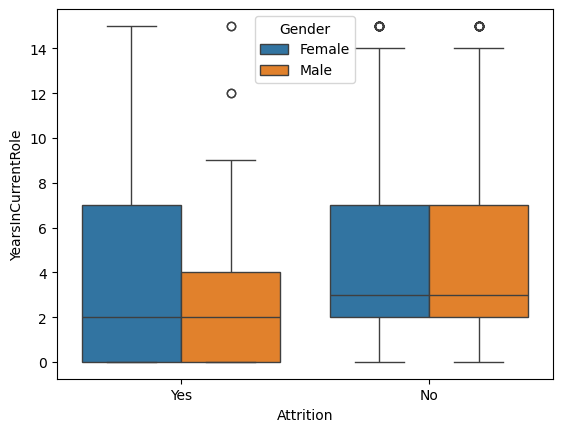

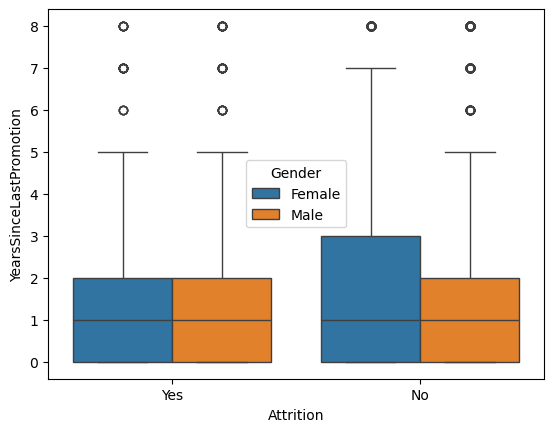

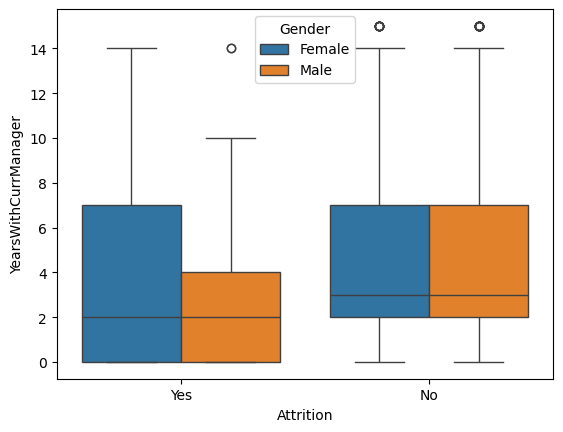

In [61]:
for i in hr.columns:
    if(i!='Attrition'):
        sns.boxplot(x=df['Attrition'],y=hr[i],hue=df.Gender)
        plt.show()
    else:
        continue

In [62]:
###############modelbuilding##############################3

In [63]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EmployeeNumber            2940 non-null   int64
 1   Attrition                 2940 non-null   int32
 2   Age                       2940 non-null   int64
 3   BusinessTravel            2940 non-null   int32
 4   DailyRate                 2940 non-null   int64
 5   Department                2940 non-null   int32
 6   DistanceFromHome          2940 non-null   int64
 7   Education                 2940 non-null   int64
 8   EducationField            2940 non-null   int32
 9   EmployeeCount             2940 non-null   int64
 10  EnvironmentSatisfaction   2940 non-null   int64
 11  Gender                    2940 non-null   int32
 12  HourlyRate                2940 non-null   int64
 13  JobInvolvement            2940 non-null   int64
 14  JobLevel                  2940 non-null 

In [64]:
hr1=hr.iloc[:,[0,1,2,4,6,7,8,10,12,13,14,15,16,17,18,19,20,22,23,25,28,30,31,32,33,34]]
hr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EmployeeNumber            2940 non-null   int64
 1   Attrition                 2940 non-null   int32
 2   Age                       2940 non-null   int64
 3   DailyRate                 2940 non-null   int64
 4   DistanceFromHome          2940 non-null   int64
 5   Education                 2940 non-null   int64
 6   EducationField            2940 non-null   int32
 7   EnvironmentSatisfaction   2940 non-null   int64
 8   HourlyRate                2940 non-null   int64
 9   JobInvolvement            2940 non-null   int64
 10  JobLevel                  2940 non-null   int64
 11  JobRole                   2940 non-null   int32
 12  JobSatisfaction           2940 non-null   int64
 13  MaritalStatus             2940 non-null   int32
 14  MonthlyIncome             2940 non-null 

In [65]:
hr1.JobRole

0       7
1       6
2       2
3       6
4       2
       ..
2935    2
2936    0
2937    4
2938    7
2939    2
Name: JobRole, Length: 2940, dtype: int32

In [66]:
x=hr1.loc[:, hr1.columns!="Attrition"]
y=hr1.Attrition

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(hr1.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2940, 26) (2205, 25) (735, 25) (2205,) (735,)


In [68]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
z=classifier.fit(X_train, y_train)

In [70]:
y_pred = classifier.predict(X_test)
print(y_pred,y_test)

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 

In [71]:
pred_comp_test=pd.DataFrame({'actual':y_test,'Pred':y_pred})
pred_comp_test

,actual,Pred
704,0,0
2482,1,1
410,0,0
2608,0,0
2594,0,0
...,...,...
906,0,0
2337,0,0
2423,1,0
204,1,0


In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[596  14]
 [ 84  41]]


In [73]:
from sklearn.metrics import accuracy_score
print('accurace:',accuracy_score(y_test,y_pred))

accurace: 0.8666666666666667


In [74]:
from sklearn.metrics import classification_report
cm_class_test=classification_report(y_test,y_pred)
print(cm_class_test)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       610
           1       0.75      0.33      0.46       125

    accuracy                           0.87       735
   macro avg       0.81      0.65      0.69       735
weighted avg       0.85      0.87      0.84       735



In [75]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(y_test,y_pred)

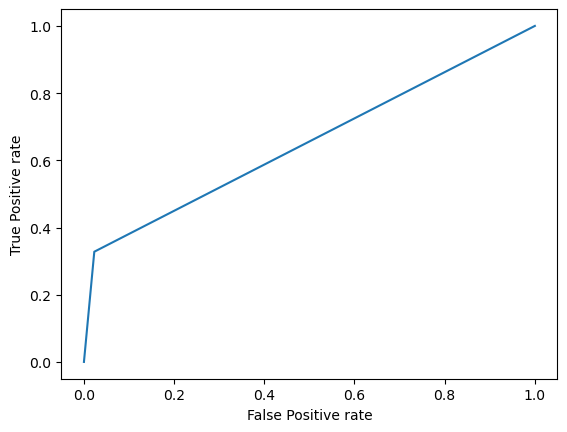

In [76]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [77]:
y_pred_train = classifier.predict(X_train)
print(y_pred_train,y_train)

[1 0 0 ... 0 1 1] 2802    1
2690    0
1222    1
793     0
2861    0
       ..
763     0
835     0
1653    0
2607    0
2732    1
Name: Attrition, Length: 2205, dtype: int32


In [78]:
pred_comp_train=pd.DataFrame({'actual':y_train,'Pred':y_pred_train})
pred_comp_train

,actual,Pred
2802,1,1
2690,0,0
1222,1,0
793,0,0
2861,0,0
...,...,...
763,0,0
835,0,0
1653,0,0
2607,0,1


In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[1815   41]
 [ 232  117]]


In [80]:
from sklearn.metrics import classification_report
cm_class_test=classification_report(y_train,y_pred_train)
print(cm_class_test)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1856
           1       0.74      0.34      0.46       349

    accuracy                           0.88      2205
   macro avg       0.81      0.66      0.70      2205
weighted avg       0.86      0.88      0.86      2205



In [81]:
from sklearn.metrics import accuracy_score
print('accurace:',accuracy_score(y_train,y_pred_train))

accurace: 0.8761904761904762


In [82]:
fpr1,tpr1,_=metrics.roc_curve(y_train,y_pred_train)

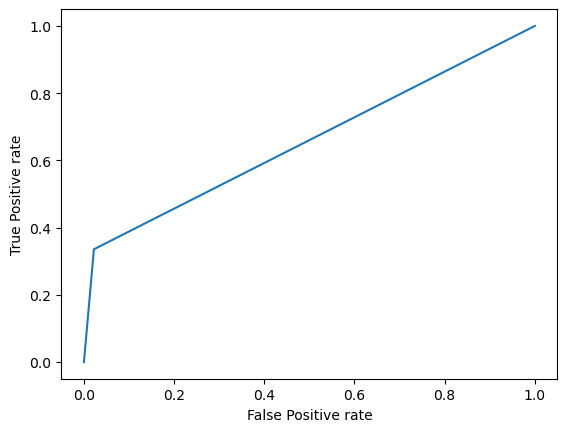

In [83]:
plt.plot(fpr1,tpr1)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [84]:
##############SVM######################

In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [86]:
train,test = train_test_split(hr1, test_size = 0.25)

In [87]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(train)
X_test = sc_x.fit_transform(test)

In [88]:
train_X = train.loc[:,train.columns!="Attrition"]
train_y = train.Attrition
test_X  = test.loc[:,test.columns!="Attrition"]
test_y  = test.Attrition

In [89]:
#linear was not working

In [90]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(train_X, train_y)
pred_train_rbf = model_rbf.predict(train_X)

res_rbf=np.mean(pred_train_rbf==train_y)
res_rbf


0.8417233560090703

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y,pred_train_rbf)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[1856    0]
 [ 349    0]]


In [92]:
df.OverTime

0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
2935     No
2936     No
2937    Yes
2938     No
2939     No
Name: OverTime, Length: 2940, dtype: object

In [93]:
# kernel = polynomial
model_poly = SVC(kernel = "poly")
model_poly.fit(train_X, train_y)
pred_train_poly= model_poly.predict(train_X)

res_poly=np.mean(pred_train_poly==train_y)
res_poly

0.8417233560090703

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y,pred_train_poly)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[1856    0]
 [ 349    0]]


In [95]:
# kernel = sigmoid
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(train_X, train_y)
pred_train_sigmoid = model_sigmoid.predict(train_X)

res_sigmoid=np.mean(pred_train_sigmoid==train_y)
res_sigmoid

0.7931972789115647

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y,pred_train_sigmoid)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[1698  158]
 [ 298   51]]


In [97]:
###############DECISION TREE########################

In [98]:
x= hr1.loc[:, hr1.columns!="Attrition"]  
y= hr.Attrition

In [99]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 
print(x.shape,y.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(2940, 25) (2940,) (2205, 25) (2205,) (735, 25) (735,)


In [100]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy')  
print(classifier.fit(x_train, y_train))

DecisionTreeClassifier(criterion='entropy')


In [101]:
#Predicting the test  
y_pred= classifier.predict(x_test)  

In [102]:
#Predicting the train
y1_pred= classifier.predict(x_train)  

In [103]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[593,  17],
       [ 23, 102]], dtype=int64)

In [104]:
from sklearn.metrics import accuracy_score
print('accurace:',accuracy_score(y_test,y_pred))

accurace: 0.9455782312925171


In [105]:
fpr2,tpr2,_=metrics.roc_curve(y_test,y_pred)

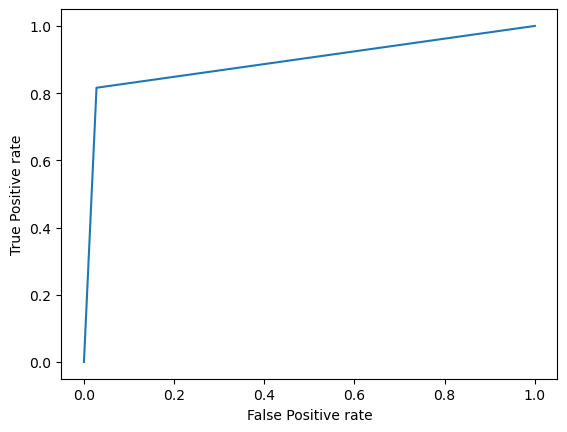

In [106]:
plt.plot(fpr2,tpr2)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [107]:
from sklearn.metrics import confusion_matrix  
cm1= confusion_matrix(y_train, y1_pred) 
cm1

array([[1856,    0],
       [   0,  349]], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score
print('accurace:',accuracy_score(y_train,y1_pred))

accurace: 1.0


In [109]:
fpr3,tpr3,_=metrics.roc_curve(y_train,y1_pred)

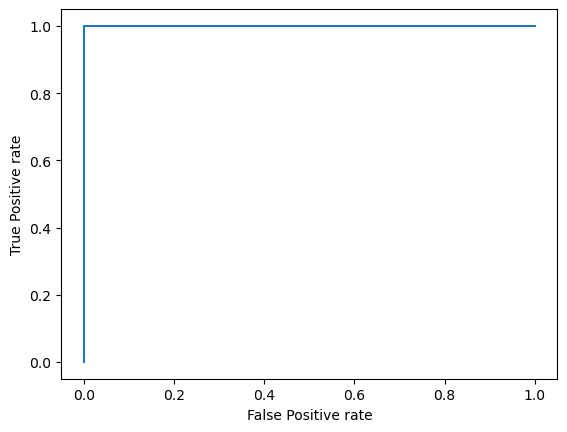

In [110]:
plt.plot(fpr3,tpr3)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

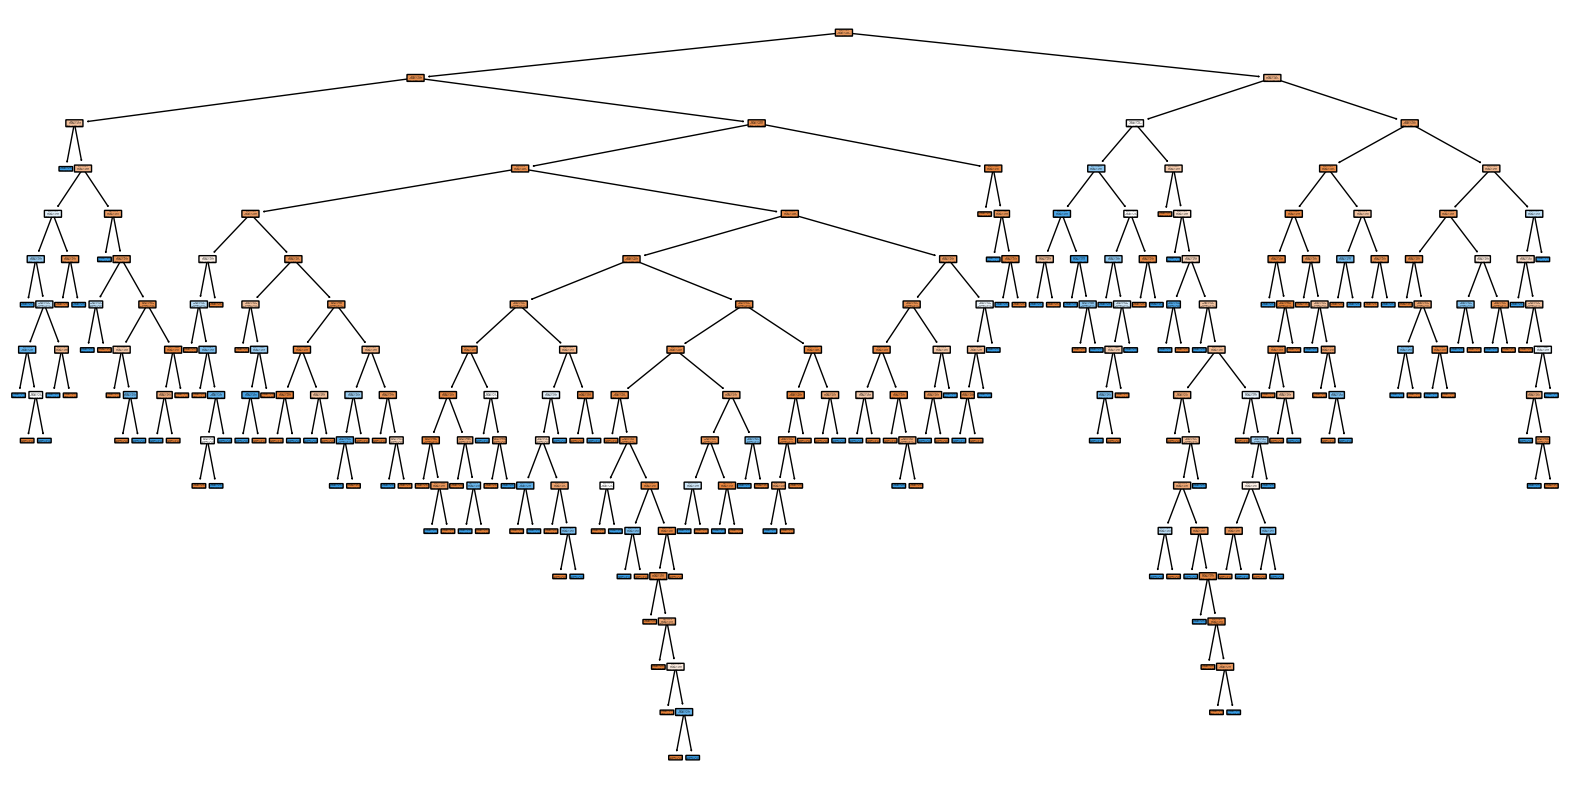

In [111]:
from sklearn import tree 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(classifier,rounded=True,filled=True,proportion=True)
plt.show()

In [112]:
##########overfitted ,doing pre pruning#############

In [113]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth=4)
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [114]:
test_pred = regtree.predict(x_test)
train_pred = regtree.predict(x_train)

In [115]:
from sklearn.metrics import mean_squared_error, r2_score

In [116]:
print(mean_squared_error(y_test, test_pred),
r2_score(y_test, test_pred))

0.1055389884029476 0.25226491790187056


In [117]:
print(mean_squared_error(y_train, train_pred),
r2_score(y_train, train_pred))

0.09846264088029338 0.2609305195787095


In [118]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 7)
regtree2.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=7)

In [119]:
test_pred2 = regtree2.predict(x_test)
train_pred2 = regtree2.predict(x_train)

In [120]:
print(mean_squared_error(y_test, test_pred2),
r2_score(y_test, test_pred2))

0.07124263038548752 0.49525180327868856


In [121]:
print(mean_squared_error(y_train, train_pred2),
r2_score(y_train, train_pred2))

0.010022675736961452 0.9247688901788361


In [122]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 3)
regtree3.fit(x_train, y_train)
test_pred3 = regtree3.predict(x_test)
train_pred3 = regtree3.predict(x_train)

In [123]:
print(mean_squared_error(y_test, test_pred3),
r2_score(y_test, test_pred3))

0.07997808012093727 0.43336185792349724


In [124]:
print(mean_squared_error(y_train, train_pred3),
r2_score(y_train, train_pred3))

0.020786092214663647 0.8439777134176465


In [125]:
regtree4 = tree.DecisionTreeRegressor(max_depth = 9,min_samples_split = 5,min_samples_leaf = 4)
regtree4.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=5)

In [126]:
test_pred4 = regtree4.predict(x_test)
train_pred4 = regtree4.predict(x_train)

In [127]:
print(mean_squared_error(y_test, test_pred4),
r2_score(y_test, test_pred3))

0.09514207999567986 0.43336185792349724


In [128]:
print(mean_squared_error(y_train, train_pred4),
r2_score(y_train, train_pred3))

0.042696021401503886 0.8439777134176465


In [129]:
###########still overfitted doing post pruning##############

In [130]:
path=classifier.cost_complexity_pruning_path(x_train,y_train)

In [131]:
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("----------------------------------------------------")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.00124938 0.0014343  0.00147171 0.00147171 0.00147171
 0.00163703 0.00163703 0.00163703 0.00176877 0.00176877 0.00176877
 0.00179372 0.00187833 0.00197212 0.00198339 0.00199109 0.00205412
 0.00205412 0.00205412 0.00212696 0.00212696 0.00230665 0.00235568
 0.00240381 0.00245128 0.00249876 0.00252742 0.00263043 0.00265544
 0.00274365 0.00274397 0.00274708 0.00274708 0.00278317 0.0028686
 0.0029342  0.00293537 0.00294341 0.00294341 0.00294341 0.00294341
 0.00297137 0.00300792 0.00301229 0.0030404  0.0031192  0.0031192
 0.00312241 0.0031231  0.00312771 0.00314242 0.00315599 0.00319654
 0.00327479 0.00334949 0.0033699  0.00343365 0.0034422  0.00345759
 0.00347532 0.00361074 0.00364207 0.00388665 0.00389799 0.00392685
 0.0039626  0.00399535 0.00401677 0.00405696 0.00411107 0.00418152
 0.00436681 0.00448899 0.00459481 0.00460503 0.00465231 0.00481824
 0.0048489  0.00495609 0.00512985 0.00518964 0.00551327 0.00610494
 0.00612055 0.00615996 0.006

In [132]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.03462745923324895


In [133]:
train_scores = [classifier.score(x_train, y_train) for classifier in clfs]

In [134]:
test_scores = [clf.score(x_test, y_test) for classifier in clfs]

In [135]:
acc_df1=pd.DataFrame({'ccp_alpha':ccp_alphas,'impurities':impurities,'Train_ACC':train_scores,'Test_ACC':test_scores})

In [136]:
acc_df1['Error']=acc_df1['Train_ACC']-acc_df1['Test_ACC']

In [137]:
print(acc_df1.ccp_alpha[6:25])

6     0.001637
7     0.001637
8     0.001637
9     0.001769
10    0.001769
11    0.001769
12    0.001794
13    0.001878
14    0.001972
15    0.001983
16    0.001991
17    0.002054
18    0.002054
19    0.002054
20    0.002127
21    0.002127
22    0.002307
23    0.002356
24    0.002404
Name: ccp_alpha, dtype: float64


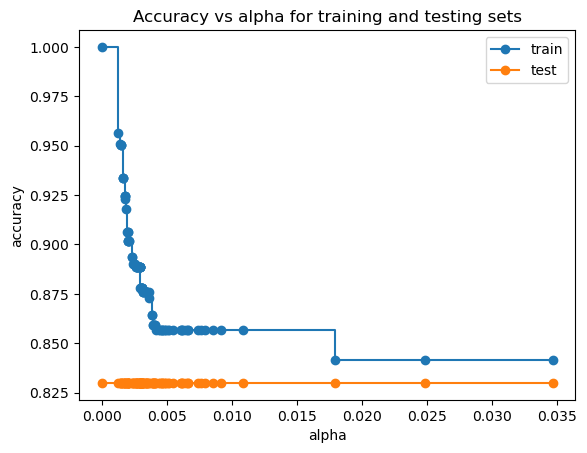

In [138]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [139]:
#0.002054,.004-.009999
classifier=DecisionTreeClassifier(random_state=0,ccp_alpha=0.002054)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.002054, random_state=0)

In [140]:
pred1=classifier.predict(x_train) 

In [141]:
from sklearn.metrics import accuracy_score
print('accurace:',accuracy_score(y_train,pred1))

accurace: 0.9015873015873016


In [142]:
pred_1= classifier.predict(x_test) 

In [143]:
print('accurace:',accuracy_score(y_test,pred_1))

accurace: 0.8870748299319728


In [144]:
from sklearn.metrics import classification_report
cm_class_test=classification_report(y_test,pred_1)
print(cm_class_test)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       610
           1       0.75      0.50      0.60       125

    accuracy                           0.89       735
   macro avg       0.83      0.73      0.77       735
weighted avg       0.88      0.89      0.88       735



In [145]:
fpr,tpr,_=metrics.roc_curve(y_test,pred_1)
fpr1,tpr1,_=metrics.roc_curve(y_train,pred1)

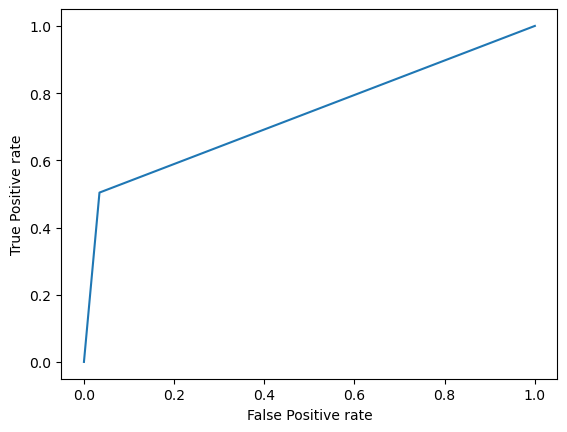

In [146]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

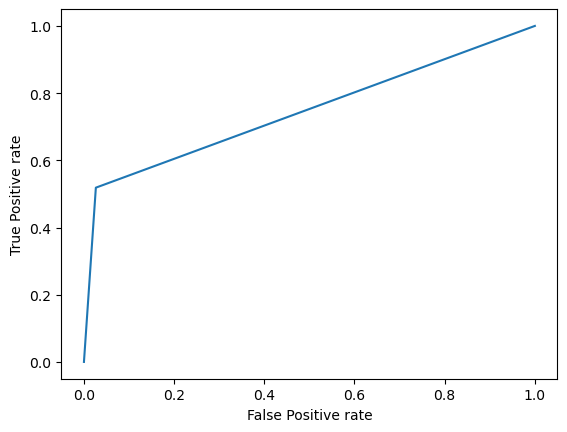

In [147]:
plt.plot(fpr1,tpr1)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

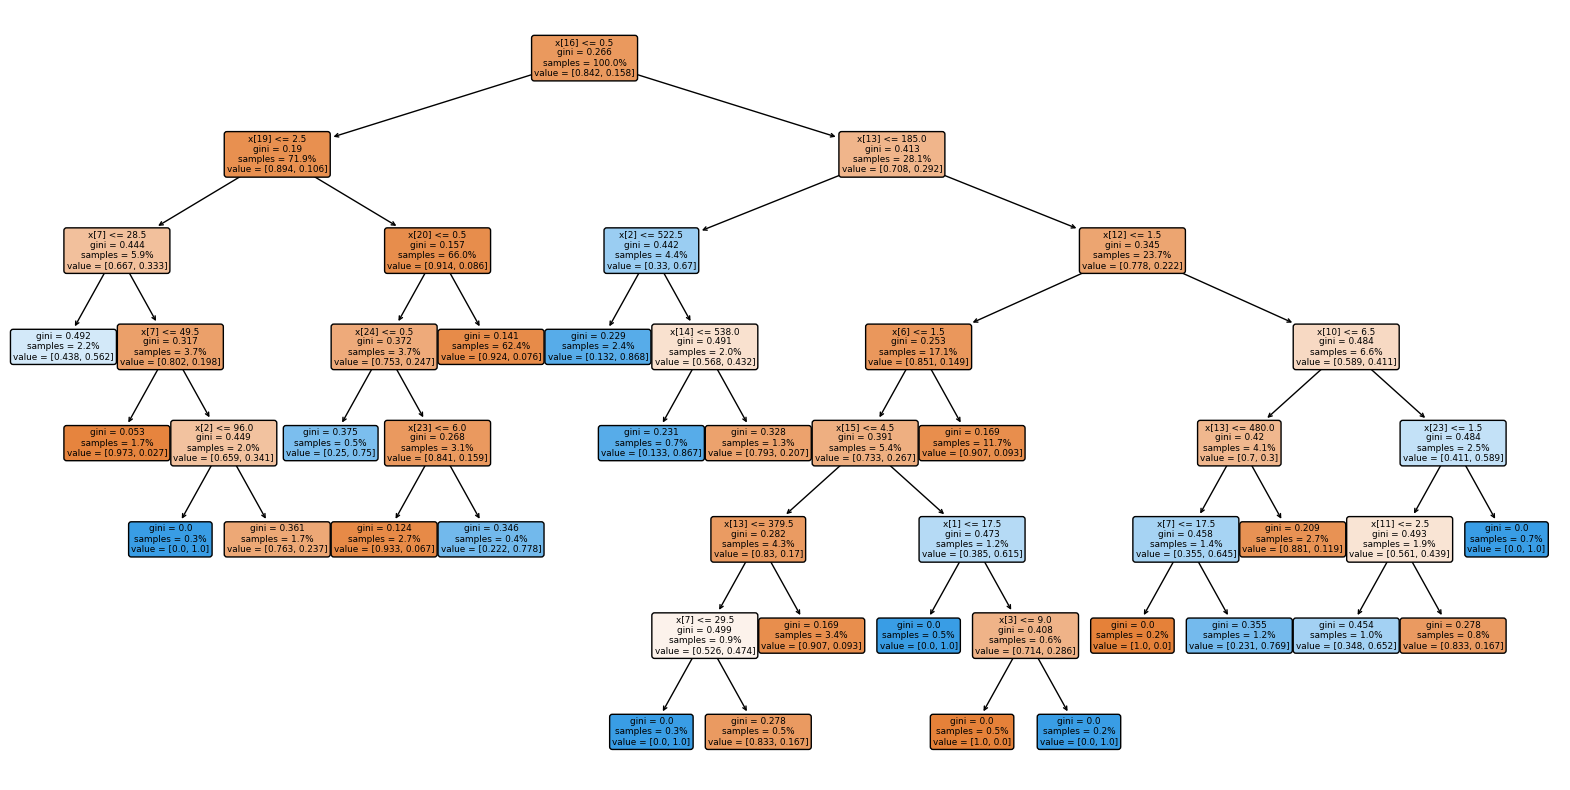

In [148]:
from sklearn import tree 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(classifier,rounded=True,filled=True,proportion=True)
plt.show()

In [149]:
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import RandomForestRegressor   # For regression

In [150]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25) 
print(x.shape,y.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(2940, 25) (2940,) (2205, 25) (2205,) (735, 25) (735,)


In [151]:
classifier= RandomForestClassifier()
print(classifier.fit(x_train, y_train))

RandomForestClassifier()


In [152]:
y1_pred= classifier.predict(x_train)  

In [153]:
y_pred= classifier.predict(x_test)  

In [154]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[613,   0],
       [ 28,  94]], dtype=int64)

In [155]:
from sklearn.metrics import accuracy_score
print('accurace:',accuracy_score(y_test,y_pred))

accurace: 0.9619047619047619


In [156]:
fpr2,tpr2,_=metrics.roc_curve(y_test,y_pred)

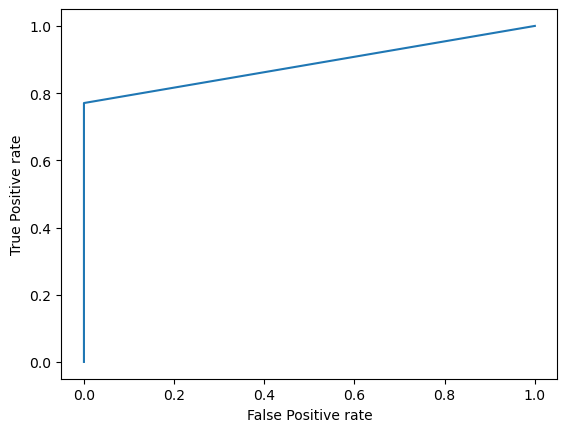

In [157]:
plt.plot(fpr2,tpr2)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [158]:
from sklearn.metrics import confusion_matrix  
cm1= confusion_matrix(y_train, y1_pred) 
cm1

array([[1853,    0],
       [   0,  352]], dtype=int64)

In [159]:
from sklearn.metrics import accuracy_score
print('accurace:',accuracy_score(y_train,y1_pred))

accurace: 1.0


In [160]:
fpr3,tpr3,_=metrics.roc_curve(y_train,y1_pred)

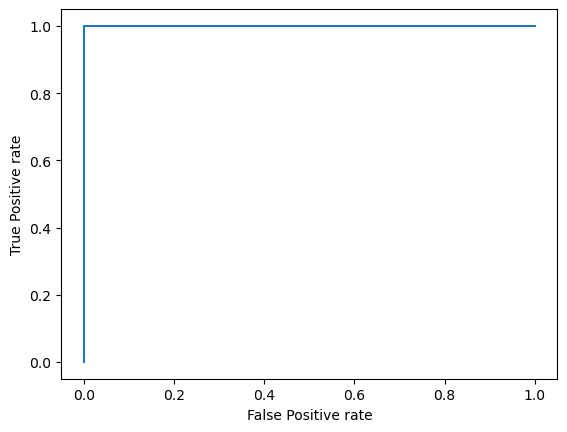

In [161]:
plt.plot(fpr3,tpr3)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()